In [2]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *

In [2]:
n=5
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(1e6),59304(1e8),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5_hard()
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


In [40]:
index,value=0,10
for i in tqdm(range(150000), desc="Training Progress"):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=500
    _,__=test_row(A=A,epochs=50,if_plot=False)
    if __ > value and _ < 2 and __ <1e7:
        index,value=i,__
print(index,value)
_,__=test_row(get_xinmeng_like_matrix(n,seed=index).T)
print(f"{_:.4e}, {__:.4e}")

Training Progress: 100%|██████████| 150000/150000 [00:37<00:00, 4006.77it/s]

85395 1906832.5293241686
1.7891e+00, 1.9068e+06


<font color=blue>数据量大，均匀分配，数据异质性小</font>

选取充分稀疏的拓扑

但实验表明，在均匀分配的数据上，Sum和Diag表现（最优的lr下）地差不多

In [4]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(1e6),59304(1e8),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()
#A=0.6*A+0.4*I
""" A=R 
B=get_B(A=A,u=2*n,n=n) """
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


异质性小的时候，Pull Sum可以达到极高正确率 97%

Training Progress:   2%|▏         | 8/500 [00:00<00:14, 33.31it/s, accuracy=77.4600000000%, epoch=10, loss=1.6196707964]

Training Progress: 100%|██████████| 500/500 [00:14<00:00, 34.09it/s, accuracy=93.6100000000%, epoch=500, loss=0.3171124458]


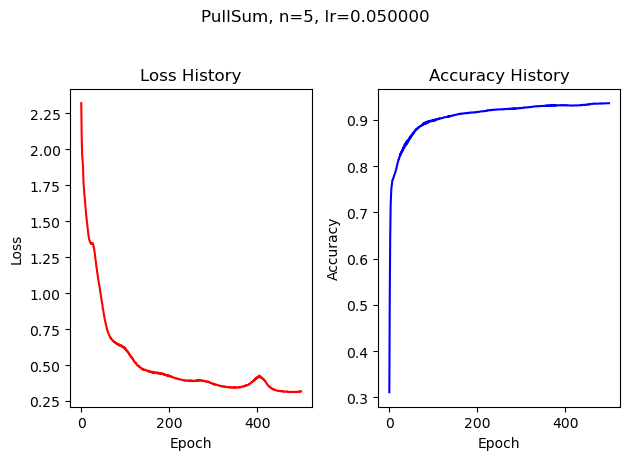

In [11]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=500,lr=(5e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   0%|          | 2/3000 [00:00<04:36, 10.85it/s, accuracy=10.2700000000%, epoch=2, loss=2.3434565067]

Training Progress: 100%|██████████| 3000/3000 [04:25<00:00, 11.28it/s, accuracy=96.8600000000%, epoch=3000, loss=1.1993674427]


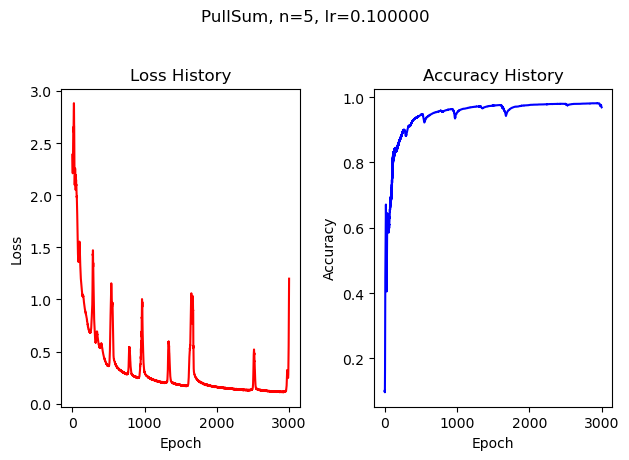

In [6]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_5layer_1,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=3000,lr=(1e-1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   1%|          | 8/1500 [00:00<00:46, 32.07it/s, accuracy=15.6100000000%, epoch=11, loss=3896363.1931640627] 

Training Progress: 100%|██████████| 1500/1500 [00:43<00:00, 34.15it/s, accuracy=89.9500000000%, epoch=1500, loss=25396.2634765625]


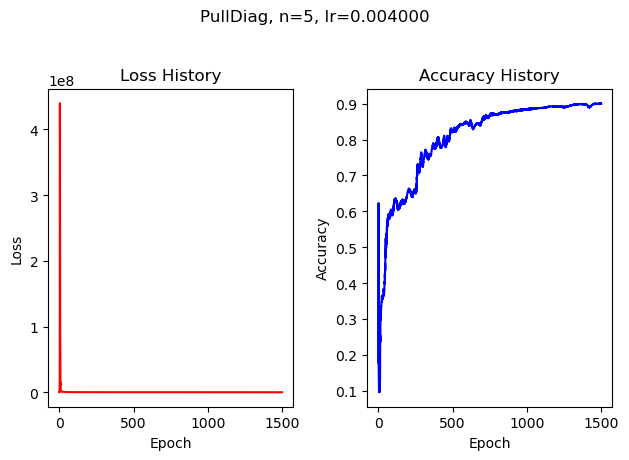

In [13]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(2e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

<font color=blue>如果选取异质性很大的数据分布</font>

In [14]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(1e6),59304(1e8),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5_hard()
#A=0.6*A+0.4*I
""" A=R 
B=get_B(A=A,u=2*n,n=n) """
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


Training Progress:   1%|          | 11/2000 [00:00<00:57, 34.42it/s, accuracy=61.2400000000%, epoch=11, loss=2.4432454348]

Training Progress: 100%|██████████| 2000/2000 [00:57<00:00, 34.75it/s, accuracy=86.3600000000%, epoch=2000, loss=0.1950851232]


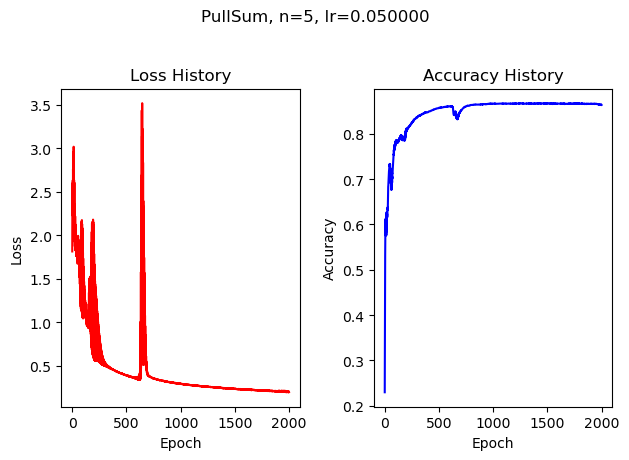

In [19]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(5e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   2%|▏         | 44/2000 [00:01<00:52, 37.20it/s, accuracy=72.6500000000%, epoch=44, loss=1.5103701115]

Training Progress: 100%|██████████| 2000/2000 [00:56<00:00, 35.15it/s, accuracy=86.3800000000%, epoch=2000, loss=0.2259453356]


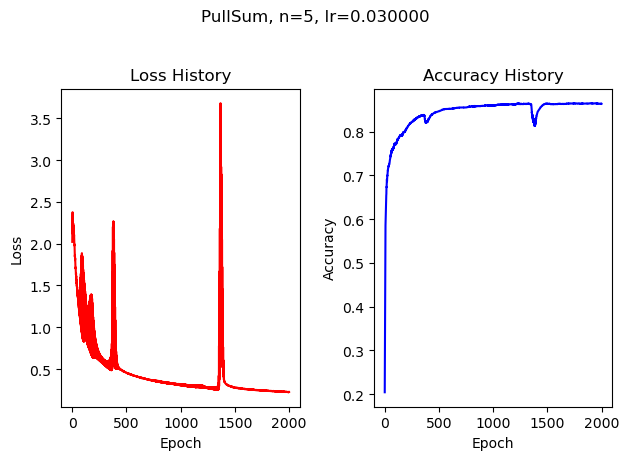

In [20]:
l2,a2=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(3e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   7%|▋         | 132/2000 [00:03<00:54, 34.32it/s, accuracy=76.5100000000%, epoch=134, loss=1.2818083763]

Training Progress: 100%|██████████| 2000/2000 [00:57<00:00, 35.09it/s, accuracy=85.0500000000%, epoch=2000, loss=0.3456656158]


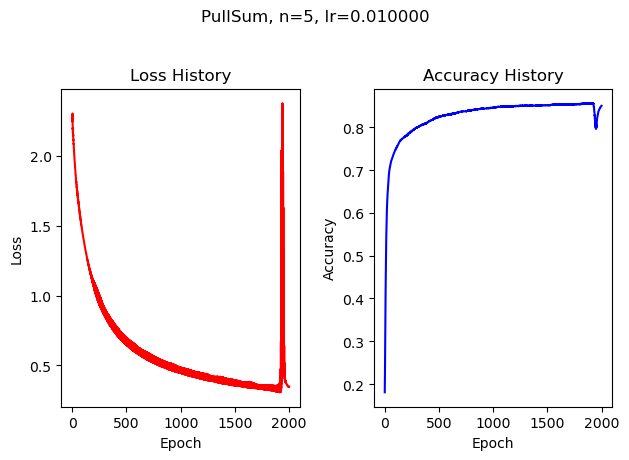

In [21]:
l3,a3=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(1e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 2000/2000 [00:57<00:00, 35.05it/s, accuracy=86.7200000000%, epoch=2000, loss=0.1898351982]


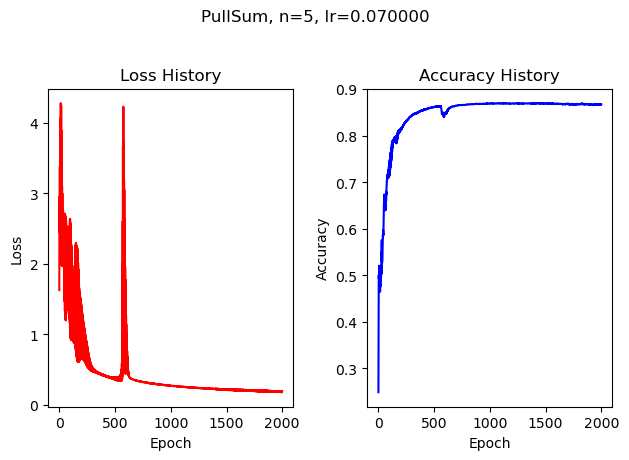

In [22]:
l4,a4=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(7e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 2000/2000 [00:58<00:00, 34.13it/s, accuracy=85.2200000000%, epoch=2000, loss=0.3897906512]


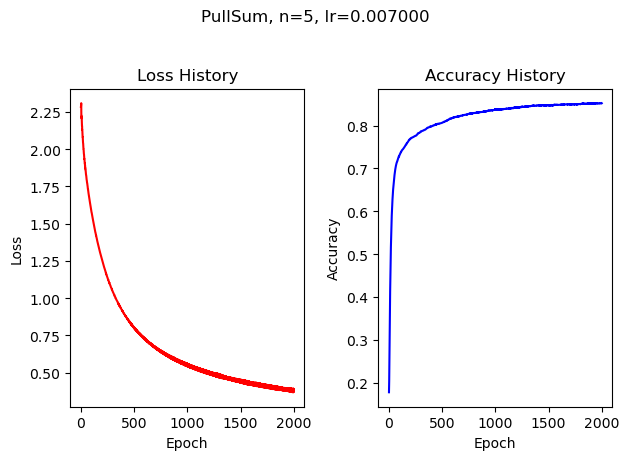

In [23]:
l5,a5=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(7e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 2000/2000 [00:57<00:00, 34.60it/s, accuracy=84.6800000000%, epoch=2000, loss=0.4510187030]


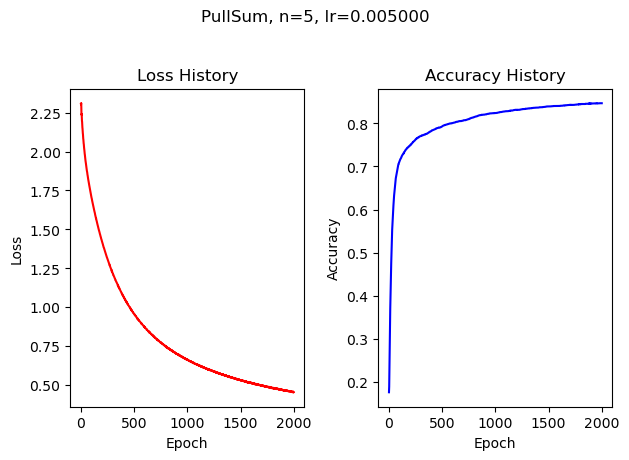

In [24]:
l6,a6=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(5e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 2000/2000 [00:50<00:00, 39.51it/s, accuracy=87.2800000000%, epoch=2000, loss=0.1789652765]


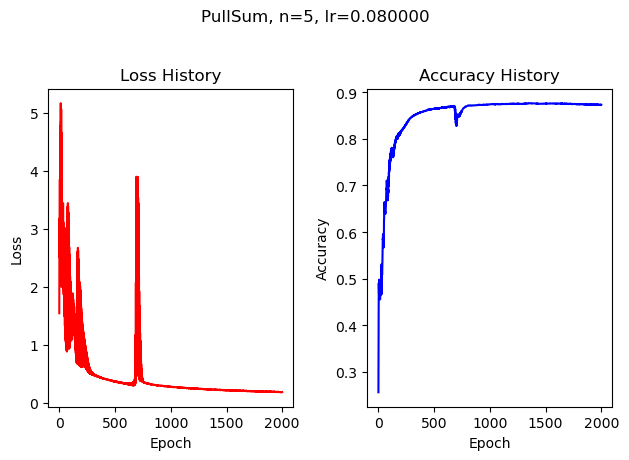

In [29]:
l7,a7=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(8e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 2000/2000 [00:49<00:00, 40.01it/s, accuracy=87.0300000000%, epoch=2000, loss=0.1731158301]


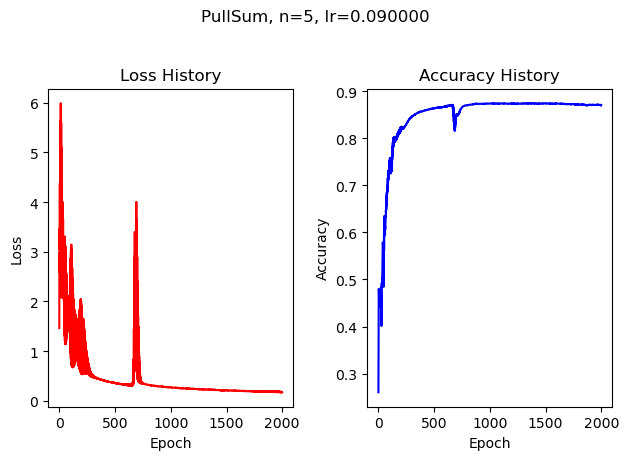

In [30]:
l8,a8=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(9e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 2000/2000 [00:48<00:00, 41.16it/s, accuracy=87.0800000000%, epoch=2000, loss=0.1685751602]


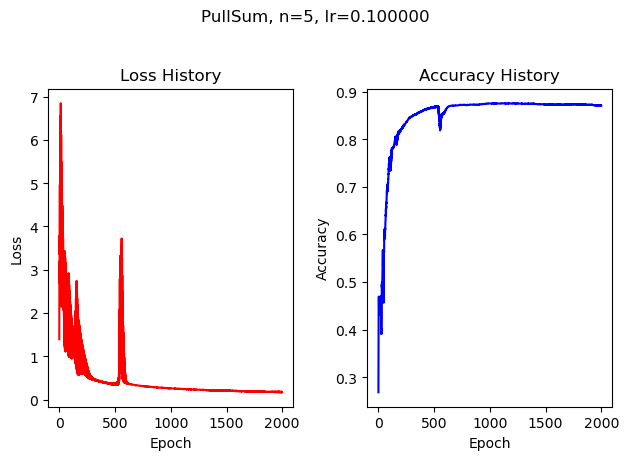

In [31]:
l9,a9=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(1e-1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 2000/2000 [00:48<00:00, 41.05it/s, accuracy=86.6100000000%, epoch=2000, loss=0.1964446098]


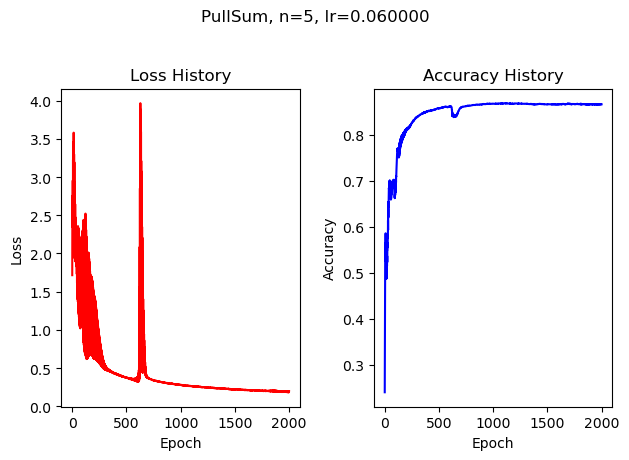

In [32]:
l10,a10=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(6e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

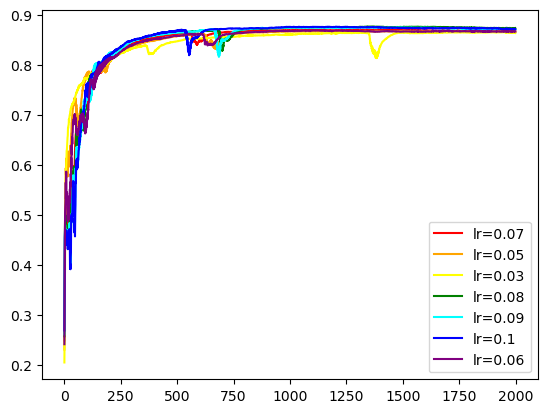

In [33]:
plt.plot(a4,color='r',label='lr=0.07')
plt.plot(a1,color='orange',label='lr=0.05')
plt.plot(a2,color='yellow',label='lr=0.03')
plt.plot(a7,color='g',label='lr=0.08')
plt.plot(a8,color='cyan',label='lr=0.09')
plt.plot(a9,color='blue',label='lr=0.1')
plt.plot(a10,color='purple',label='lr=0.06')
""" plt.plot(a3,color='g',label='lr=0.01')
plt.plot(a5,color='cyan',label='lr=0.007')
plt.plot(a6,color='blue',label='lr=0.005') """
plt.legend()
plt.show()

Training Progress: 100%|██████████| 1500/1500 [00:42<00:00, 34.98it/s, accuracy=57.3100000000%, epoch=1500, loss=599395.5281250000] 


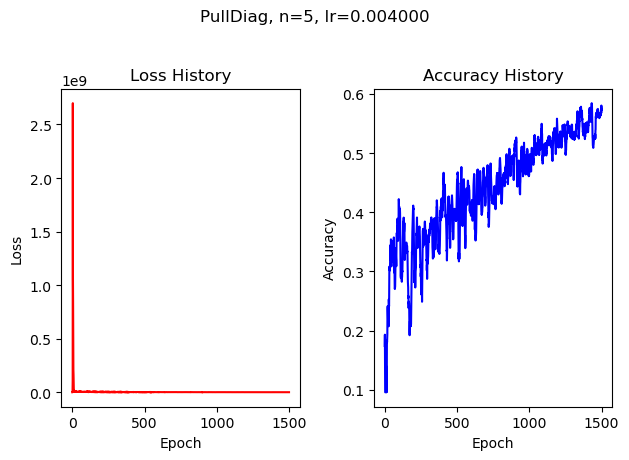

In [15]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(2e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)